<a href="https://colab.research.google.com/github/Nemat-Allah-Aloush/Evolutionary_Computing/blob/main/ec_lab1_Aloush.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nemat Allah Aloush - J42332c


In [1]:
pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 8.1 MB/s 


#### ga_scheme.py

In [25]:
from deap import tools
import random
# this block defines how the algorithm works 
def varOr(population, toolbox, lambda_, cxpb, mutpb):
    offspring = []
    for _ in range(lambda_):
        op_choice = random.random()
        if op_choice < cxpb:            # Apply crossover
            ind1, ind2 = list(map(toolbox.clone, random.sample(population, 2)))
            ind1, ind2 = toolbox.mate(ind1, ind2)
            del ind1.fitness.values
            del ind2.fitness.values
            offspring.append(ind1)
        elif op_choice < cxpb + mutpb:  # Apply mutation
            ind = toolbox.clone(random.choice(population))
            ind, = toolbox.mutate(ind)
            del ind.fitness.values
            offspring.append(ind)
        else:                           # Apply reproduction
            offspring.append(toolbox.clone(random.choice(population)))

    return offspring

# the algorithm function that will use all the components we defined
def eaMuPlusLambda(population, toolbox, mu, lambda_, cxpb, mutpb, ngen,
                   stats=None, halloffame=None, verbose=__debug__):
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    # evaluate the fitness over all the individuals using 'map '
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is not None:
        halloffame.update(population)

    record = stats.compile(population) if stats is not None else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):
        # Vary the population
        if halloffame is not None:
            for ind in halloffame:
                population.append(toolbox.clone(ind))
        #'varOr' perform cross-over and mutation and get the children,
        offspring = varOr(population, toolbox, lambda_, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Update the hall of fame with the generated individuals
        if halloffame is not None:
            halloffame.update(offspring)

        # Select the next generation population
        population[:] = toolbox.select(population + offspring, mu)

        # Update the statistics with the new population
        record = stats.compile(population) if stats is not None else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook



#### draw_log.py

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def read_log(log):
    avg_list = list()
    std_list = list()
    min_list = list()
    max_list = list()
    gen_list = list()
    for g in log:
        avg_list.append(g['avg'])
        std_list.append(g['std'])
        min_list.append(g['min'])
        max_list.append(g['max'])
        gen_list.append(g['gen'])
    return np.array(gen_list), np.array(avg_list), np.array(std_list), np.array(max_list), np.array(min_list)

def draw_log(log):
    gen_list, avg_list, std_list, max_list, min_list = read_log(log)
    plt.plot(gen_list, avg_list, label="avg")
    plt.plot(gen_list, min_list, label="min")
    plt.plot(gen_list, max_list, label="max")
    plt.fill_between(gen_list, avg_list-std_list, avg_list+std_list, alpha=0.2)
    plt.legend()
    plt.tight_layout()
    plt.show()

def draw_logs(log1, log2, lab1, lab2):
    gen1, avg1, std1, max1, min1 = read_log(log1)
    gen2, avg2, std2, max2, min2 = read_log(log2)
    plt.plot(gen1, avg1, label=lab1, color="blue")
    plt.plot(gen1, max1, label="{}_max".format(lab1), color="blue", linewidth=2)
    plt.fill_between(gen1, avg1 - std1, avg1 + std1, alpha=0.2, color="blue")
    plt.plot(gen2, avg2, label=lab2, color="orange")
    plt.plot(gen2, max2, label="{}_max".format(lab2), color="orange", linewidth=2)
    plt.fill_between(gen2, avg2 - std2, avg2 + std2, alpha=0.2, color="orange")
    plt.legend()
    plt.tight_layout()
    plt.show()


#### functions.py

In [27]:
import numpy as np
import math
import random

displace = random.random()

def rastrigin(individual):
    n = len(individual)
    pi = math.pi
    dn = 1.0 / n
    a = 10.0
    b = 0.2
    c = 2 * pi
    s1 = 0.0
    s2 = 0.0
    for i in range(n):
        s1 += (individual[i]-displace) * (individual[i]-displace)
        s2 += np.cos(c*(individual[i]-displace))
    s1 = -a * math.exp(-b*math.sqrt(dn*s1))
    s2 = -math.exp(dn*s2)
    result = s1+s2 + a + math.exp(1)
    result = -result
    result = result + a
    result = math.fabs(result)
    return result

#### ga_exp.py

In [38]:
from deap import tools, base
from multiprocessing import Pool
from numpy import random as rnd
import numpy as np
from deap import creator
from deap import benchmarks

creator.create("BaseFitness", base.Fitness, weights=(1.0,))
creator.create("Individual", np.ndarray, fitness=creator.BaseFitness)

def mutation(individual):
    n = len(individual)
    for i in range(n):
        if rnd.random() < n * 0.15:
            individual[i] += rnd.normal(0.0, 0.8)
            individual[i] = np.clip(individual[i], -5, 5)
    return individual


/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'BaseFitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [33]:
class SimpleGAExperiment:
    def factory(self):
        return rnd.random(self.dimension) * 10 - 5

    def __init__(self, function, dimension, pop_size, iterations):
        self.pop_size = pop_size
        self.iterations = iterations
        self.mut_prob = 0.97
        self.cross_prob = 0.35

        self.function = function
        self.dimension = dimension

        self.engine = base.Toolbox()        
        self.engine.register("map", map)
        self.engine.register("individual", tools.initIterate, creator.Individual, self.factory)
        self.engine.register("population", tools.initRepeat, list, self.engine.individual, self.pop_size)     
        self.engine.register("mate", tools.cxUniform, indpb=0.15)
        self.engine.register("mutate", tools.mutShuffleIndexes, indpb=0.25)
        self.engine.register("select", tools.selRoulette)
        self.engine.register("evaluate", self.function)


    def run(self):
        pop = self.engine.population()
        hof = tools.HallOfFame(3, np.array_equal)
        stats = tools.Statistics(lambda ind: ind.fitness.values[0])
        stats.register("avg", np.mean)
        stats.register("std", np.std)
        stats.register("min", np.min)
        stats.register("max", np.max)

        pop, log = eaMuPlusLambda(pop, self.engine, mu=self.pop_size, lambda_=int(self.pop_size*0.8), cxpb=self.cross_prob, mutpb=self.mut_prob,
                                  ngen=self.iterations,
                                  stats=stats, halloffame=hof, verbose=True)
        print("Best = {}".format(hof[0]))
        print("Best fit = {}".format(hof[0].fitness.values[0]))
        return log


gen	nevals	avg    	std     	min   	max    
0  	100   	3.88001	0.160042	3.4292	4.34076
1  	80    	3.91735	0.175188	3.4292	4.34076
2  	80    	3.9661 	0.180765	3.48986	4.34076
3  	80    	3.99761	0.204723	3.48986	4.34076
4  	80    	4.04936	0.179041	3.55833	4.41825
5  	80    	4.09805	0.195494	3.64755	4.4552 
6  	80    	4.12307	0.206742	3.62746	4.4552 
7  	80    	4.16741	0.205852	3.62746	4.4552 
8  	80    	4.19371	0.186391	3.59896	4.46096
9  	80    	4.18443	0.219141	3.58706	4.60908
10 	80    	4.21424	0.226454	3.58706	4.60908
11 	80    	4.23253	0.227852	3.58706	4.60908
12 	80    	4.25294	0.23504 	3.58706	4.60908
13 	80    	4.27106	0.268186	3.58706	4.60908
14 	80    	4.30469	0.216898	3.67104	4.60908
15 	80    	4.2801 	0.248144	3.67104	4.63182
16 	80    	4.26063	0.283106	3.67104	4.69303
17 	80    	4.29686	0.28035 	3.56546	4.69303
18 	80    	4.29532	0.272883	3.68356	4.69303
19 	80    	4.335  	0.299174	3.68356	4.69303
20 	80    	4.40293	0.27829 	3.7259 	4.69303
21 	80    	4.44625	0.246765	3.77096

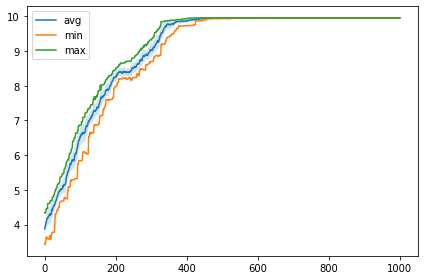

In [39]:
def function(x):
    res = rastrigin(x)
    return res,
    
dimension = 100 # set to 100
pop_size = 100 # max is 100
iterations = 1000 # max is 10000
scenario = SimpleGAExperiment(function, dimension, pop_size, iterations)
log = scenario.run()

draw_log(log)

- The algorithm successfully found best fitness value 9.954.

- The fitness value started to stable around iteration #540.